<a href="https://colab.research.google.com/github/aleksandra0014/spotify/blob/master/lista1_strumienie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from ipywidgets import interact, FloatSlider, Dropdown, IntSlider
import pandas as pd
import seaborn as sns

In [85]:
# funkcja do tworzenia fazy na podsatawie f, fs, n
# fs - częstotliwość próbkowania
# f - częstotliwość sygnału
# n - wektor próbek

n1 = np.arange(1000)

def faza_func(fs=30000,f=100,n=n1):
  faza = (n*2*np.pi *f/fs) % (2*np.pi)
  return faza

def sinus(faza):
  return np.sin(faza)

def prost(faza):
  return signal.square(faza)

def pilokszt(faza):
  return signal.sawtooth(faza)

def swiergotliwy(n=n1, f0=1, f1=10000, t1=1000, method='linear'):
  return signal.chirp(n, f0, f1, t1, method)

def superpozycja(faza, n):
  faza2 = faza_func(f=300, n=n)
  return np.sin(faza+15) + np.cos(faza2)

def impuls(k, n=n1):
  i = np.zeros_like(n)
  i[::k] = 1
  return i



In [86]:
def wykres_wspolny(n):

  N = np.arange(n)
  w = faza_func(n=N)

  plt.figure(figsize=(10,8))

  plt.subplot(3, 2, 1)
  plt.plot(N, sinus(w))
  plt.title('Sinus')
  plt.xlabel('Nr próbki')
  plt.ylabel('Amplituda')

  plt.subplot(3, 2, 2)
  plt.plot(N, prost(w))
  plt.title('Prostokątny')
  plt.xlabel('Nr próbki')
  plt.ylabel('Amplituda')

  plt.subplot(3, 2, 3)
  plt.plot(N, pilokszt(w))
  plt.title('Piłokształtny')
  plt.xlabel('Nr próbki')
  plt.ylabel('Amplituda')

  plt.subplot(3, 2, 4)
  plt.plot(N, swiergotliwy(n=N))
  plt.title('Świergotliwy')
  plt.xlabel('Nr próbki')
  plt.ylabel('Amplituda')

  plt.subplot(3, 2, 5)
  plt.plot(N, superpozycja(faza=w, n=N))
  plt.title('Superpozycja sinus i cosinus')
  plt.xlabel('Nr próbki')
  plt.ylabel('Amplituda')

  plt.subplot(3, 2, 6)
  plt.plot(N, impuls(k=100, n=N))
  plt.title('Impuls jednostkowy')
  plt.xlabel('Nr próbki')
  plt.ylabel('Amplituda')

  plt.tight_layout()
  plt.show()

n = FloatSlider(name='Liczby w tablicy', min=100, max=1100, step=10, value=100)
interact(wykres_wspolny, n=n)



interactive(children=(FloatSlider(value=100.0, description='n', max=1100.0, min=100.0, step=10.0), Output()), …

<function __main__.wykres_wspolny(n)>

In [30]:
def wykres_4(f, fs):

  N = np.arange(1000)
  w = faza_func(n=N, f=f, fs=fs)

  plt.figure(figsize=(10,8))

  plt.subplot(3, 2, 1)
  plt.plot(N, sinus(w))
  plt.title('Sinus')
  plt.xlabel('Nr próbki')
  plt.ylabel('Amplituda')

  plt.subplot(3, 2, 2)
  plt.plot(N, prost(w))
  plt.title('Prostokątny')
  plt.xlabel('Nr próbki')
  plt.ylabel('Amplituda')

  plt.subplot(3, 2, 3)
  plt.plot(N, pilokszt(w))
  plt.title('Piłokształtny')
  plt.xlabel('Nr próbki')
  plt.ylabel('Amplituda')

  plt.subplot(3, 2, 4)
  plt.plot(N, superpozycja(faza=w, n=N))
  plt.title('Superpozycja sinus i cosinus')
  plt.xlabel('Nr próbki')
  plt.ylabel('Amplituda')

  plt.tight_layout()
  plt.show()

f = FloatSlider(name='Częstotliwość', min=0, max=500, step=10, value=200)
fs = FloatSlider(name='Częstotliwość próbkowania', min=0, max=48000, step=10, value=20000)
interact(wykres_4, f=f, fs=fs)

interactive(children=(FloatSlider(value=200.0, description='f', max=500.0, step=10.0), FloatSlider(value=20000…

<function __main__.wykres_4(f, fs)>

In [50]:
def wykres_2(k, m, n=1000):

  N = np.arange(n)
  w = faza_func(n=N)

  plt.figure(figsize=(10,8))

  plt.subplot(3, 2, 1)
  plt.plot(N, swiergotliwy(n=N, method=m))
  plt.title('Świergotliwy')
  plt.xlabel('Nr próbki')
  plt.ylabel('Amplituda')

  plt.subplot(3, 2, 2)
  plt.plot(N, impuls(k=k, n=N))
  plt.title('Impuls jednostkowy')
  plt.xlabel('Nr próbki')
  plt.ylabel('Amplituda')

  plt.tight_layout()
  plt.show()


k = IntSlider(name='Liczba 1', min=50, max=900, step=10, value=100)
m = Dropdown(options=['linear', 'quadratic', 'logarithmic'], value='linear', description='Metoda:')
interact(wykres_2, k=100, m=m)

interactive(children=(IntSlider(value=100, description='k', max=300, min=-100), Dropdown(description='Metoda:'…

<function __main__.wykres_2(k, m, n=1000)>

In [37]:
N = np.arange(1000)
faza3 = faza_func(n=N)
sygnal = np.sin(faza3)
df = pd.DataFrame({'Nr Próbki': N, 'Sinus': sygnal})
df.to_csv('sygnal_sinus.csv', index=False)

print("Plik 'sygnal_sinus.csv' został zapisany pomyślnie.")


Plik 'sygnal_sinus.csv' został zapisany pomyślnie.


In [39]:
df = pd.read_csv('sygnal_sinus.csv')
df.head()

,Nr Próbki,Sinus
0,0,0.000000
1,1,0.020942
2,2,0.041876
3,3,0.062791
4,4,0.083678


In [53]:
np.random.seed(0)

def histograms(L, b):
    przebieg_rand = np.random.rand(L)
    przebieg_randn = np.random.randn(L)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(przebieg_rand, bins=b, kde=True, color='blue', edgecolor='black')
    plt.title('Histogram - przebiegi z rozkładu jednostajnego')
    plt.xlabel('Wartość')
    plt.ylabel('Częstość')

    plt.subplot(1, 2, 2)
    sns.histplot(przebieg_randn, bins=b, kde=True, color='green', edgecolor='black')
    plt.title('Histogram - przebiegi z rozkładu Gaussa')
    plt.xlabel('Wartość')
    plt.ylabel('Częstość')

    plt.tight_layout()
    plt.show()

interact(histograms, L=IntSlider(min=100, max=2000, step=100, value=1000),
         b=IntSlider(min=5, max=20, step=1, value=10))

interactive(children=(IntSlider(value=1000, description='L', max=2000, min=100, step=100), IntSlider(value=10,…

<function __main__.histograms(L, b)>

In [92]:
L = 1000
b = 10

def wykresy_normalne(L,b):
  num_przebiegow = 5

  przebiegi_normalne = [np.random.normal(loc=0, scale=1, size=L),
                        np.random.normal(loc=2, scale=2, size=L),
                        np.random.normal(loc=3, scale=1, size=L),
                        np.random.normal(loc=5, scale=3, size=L),
                        np.random.normal(loc=1, scale=1, size=L)]

  #loc - średnia
  #scale - odchylenie

  plt.figure(figsize=(10, 15))
  for i, przebieg in enumerate(przebiegi_normalne):
      plt.subplot(num_przebiegow, 1, i+1)
      sns.histplot(przebieg, bins=b, kde=False, color='violet')
      plt.title(f'Przebieg {i+1}')
      plt.xlabel('Wartość')
      plt.ylabel('Gęstość')

  plt.tight_layout()
  plt.show()

interact(wykresy_normalne, L=IntSlider(min=100, max=2000, step=100, value=1000),
         b=IntSlider(min=5, max=20, step=1, value=20))

interactive(children=(IntSlider(value=1000, description='L', max=2000, min=100, step=100), IntSlider(value=20,…

<function __main__.wykresy_normalne(L, b)>

In [89]:

N = 10000  # liczba próbek
dt = 1.0  # krok czasowy

def szum_czerwony(N, dt, b):
  T = N * dt  # całkowity czas trwania szumu
  # Szum biały
  white_noise = np.random.randn(N)

  # Szum czerwony
  red_noise = np.cumsum(white_noise) * np.sqrt(dt)

  plt.figure(figsize=(8, 6))
  plt.hist(red_noise, bins=b, density=True, color='pink', edgecolor='black')
  plt.title('Histogram szumu czerwonego (Browna)')
  plt.xlabel('Wartość')
  plt.ylabel('Gęstość')
  plt.show()

interact(szum_czerwony, N=IntSlider(min=100, max=2000, step=100, value=1000),
           dt=FloatSlider(min=0.5, max=2.0, step=0.1, value=1.0),
         b=IntSlider(min=5, max=50, step=1, value=25))


interactive(children=(IntSlider(value=1000, description='N', max=2000, min=100, step=100), FloatSlider(value=1…

<function __main__.szum_czerwony(N, dt, b)>

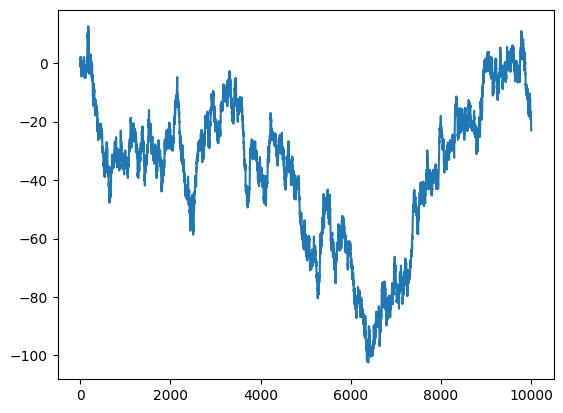

In [96]:
white_noise = np.random.randn(N)
red_noise = np.cumsum(white_noise) * np.sqrt(dt)
x = list(range(len(red_noise)))

plt.plot(x, red_noise)

In [82]:

def szum_2d(N, dt):
  white_noise_2d = np.random.randn(2, N)
  red_noise_2d = np.cumsum(white_noise_2d, axis=1) * np.sqrt(dt)

  plt.figure(figsize=(8, 8))
  plt.plot(red_noise_2d[0], red_noise_2d[1], color='red', alpha=0.7)
  plt.title('Dwuwymiarowy szum czerwony (Browna)')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.grid(True)
  plt.show()

interact(szum_2d, N=IntSlider(min=100, max=2000, step=100, value=1000),
           dt=FloatSlider(min=0.5, max=2.0, step=0.1, value=1.0))

interactive(children=(IntSlider(value=1000, description='N', max=2000, min=100, step=100), FloatSlider(value=1…

<function __main__.szum_2d(N, dt)>